<a href="https://colab.research.google.com/github/satyam0999/Data_Science_Projects/blob/main/Projects/GPU%20Kernel%20Performance/DATA_SCIENCE_PROJECT_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('sgemm_product.csv')

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [ ]:
df.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [ ]:
df.shape

(241600, 18)

In [ ]:
df['Run']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)

#df['Run']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].median(axis=1)

In [ ]:
df = df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [ ]:
X=df.iloc[:,0:10]

In [ ]:
X

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN
0,16,16,16,8,8,8,8,2,1,1
1,16,16,16,8,8,8,8,2,1,1
2,16,16,16,8,8,8,8,2,1,1
3,16,16,16,8,8,8,8,2,1,1
4,16,16,16,8,8,8,8,2,1,1
...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4
241596,128,128,32,32,32,32,32,8,4,4
241597,128,128,32,32,32,32,32,8,4,4
241598,128,128,32,32,32,32,32,8,4,4


In [ ]:
y=df.iloc[:,14]

In [ ]:
y

0         116.3700
1          78.7050
2          80.5650
3          86.6375
4         118.6625
            ...   
241595     17.8175
241596     36.0350
241597     35.1600
241598     28.4525
241599     17.8175
Name: Run, Length: 241600, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn import linear_model

In [ ]:
mse=[]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
r2 = r2_score(y_train,y_pred)

In [ ]:
r2

0.39928162841605574

In [ ]:
# calculate mean square error

mse = mean_squared_error(y_train, y_pred)

mse

80562.87034598191

In [ ]:
import seaborn as sns

In [ ]:
MWG = df.groupby('MWG')['MWG'].count()

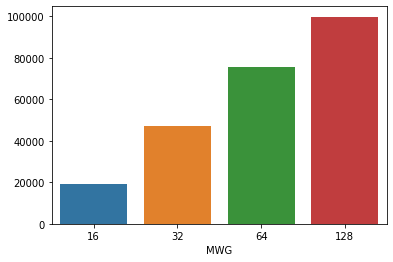

In [ ]:
sns.barplot(x=MWG.index,y=MWG.values)

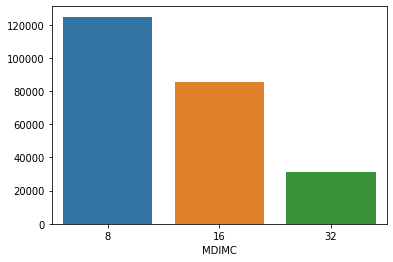

In [ ]:
MDIMC = df.groupby('MDIMC')['MDIMC'].count()

sns.barplot(x=MDIMC.index,y=MDIMC.values)

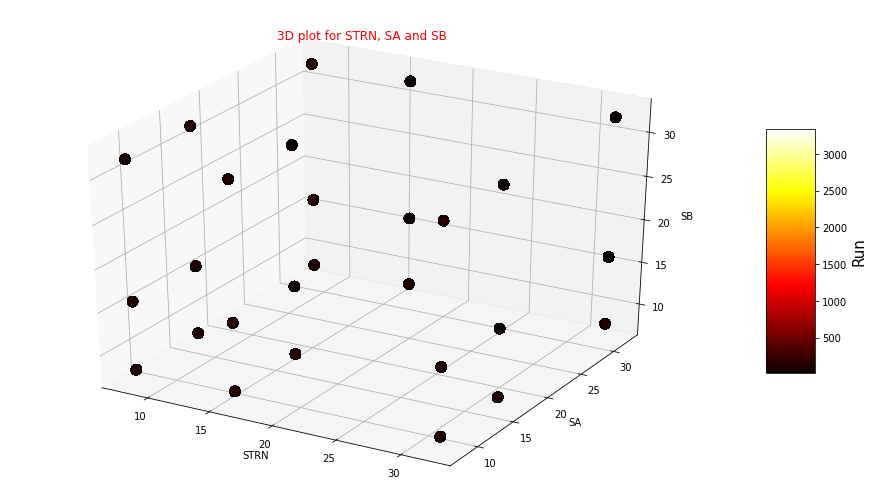

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(df["MDIMC"],
           df["MDIMA"],
           df["NDIMB"],
           linewidth=1,edgecolor ="k",
           c=df["Run"],s=100,cmap="hot")

ax.set_xlabel("MDIMC")
ax.set_ylabel("MDIMA")
ax.set_zlabel("NDIMB")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Run",fontsize = 15)

plt.title("3D plot for STRN, SA and SB ",color="red")
plt.show()